## Agents and Tools

### Load API Keys

In [23]:
import os
from dotenv import load_dotenv


OPENAI_API_KEY=os.getenv("OPENAI_API_KEY")

### Load LLM Model

In [24]:
from langchain_openai import ChatOpenAI


model = ChatOpenAI(model="gpt-4.1-nano",
                    api_key=OPENAI_API_KEY,
                    temperature=0.3,
                    max_tokens=512 )


### Basic Agent with out any tool

In [6]:
from langchain.agents import create_agent


agent = create_agent(model, tools=[])

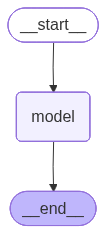

In [7]:
agent

### User query

In [11]:
input_message = {
    "role": "user",
    "content": "Who is the president of USA ?",
}

### Display

In [12]:
for step in agent.stream(
    {"messages": [input_message]},
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

Who is the president of USA ?
================================== Ai Message ==================================

As of October 2023, the President of the United States is Joe Biden.


## Adding a simple static hard coded tool

In [13]:
from langchain.tools import tool

@tool
def get_static_weather(location:str)->str:
    """
    get weather of a location

    input: location of a city
    output: weather of the desired city
    """

    return f"It's cloudy in {location}"


In [14]:
from langchain.agents import create_agent


agent = create_agent(model, tools=[get_static_weather])

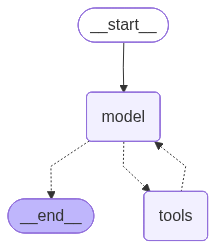

In [15]:
agent

### User Query

In [16]:

input_message = {
    "role": "user",
    "content":"What is the current weather of Guwahati ?",
}

### Display

In [17]:
for step in agent.stream(
    {"messages": [input_message]},
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

What is the current weather of Guwahati ?
================================== Ai Message ==================================
Tool Calls:
  get_static_weather (call_qMoMh2D3qf0I5J2M11Kp2pmB)
 Call ID: call_qMoMh2D3qf0I5J2M11Kp2pmB
  Args:
    location: Guwahati
================================= Tool Message =================================
Name: get_static_weather

It's cloudy in Guwahati
================================== Ai Message ==================================

The current weather in Guwahati is cloudy.


## Single Tool Agent Example : DuckDuckGo 

In [18]:
from langchain_community.tools import DuckDuckGoSearchRun

search_tool = DuckDuckGoSearchRun()

In [19]:
from langchain.agents import create_agent


agent = create_agent(model, tools=[search_tool])

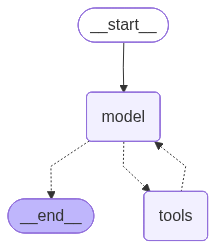

In [20]:
agent

### User Query

In [21]:
input_message = {
    "role": "user",
    "content":"In which city PM Narendra Modi is inaugrating new airport terminal on 20th Dec 2025 ??",
}

### Display

In [22]:
for step in agent.stream(
    {"messages": [input_message]},
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

In which city PM Narendra Modi is inaugrating new airport terminal on 20th Dec 2025 ??
================================== Ai Message ==================================
Tool Calls:
  duckduckgo_search (call_E3uMZp5618U1ox51gFiWo8T8)
 Call ID: call_E3uMZp5618U1ox51gFiWo8T8
  Args:
    query: Narendra Modi inaugurating new airport terminal on 20th Dec 2025
  duckduckgo_search (call_9MIrmiLNdNRQLAeLm34T8TFQ)
 Call ID: call_9MIrmiLNdNRQLAeLm34T8TFQ
  Args:
    query: Narendra Modi 20th Dec 2025 airport inauguration location
================================= Tool Message =================================
Name: duckduckgo_search

Pics: PM Modi To Inaugurate India's 1st Nature-Themed Airport Terminal In Assam Today. The architecture and decor draw heavily from the cultural and natural heritage of Northeast India. The interiors celebrate the region's rare orchids, reflect the texture and warmth of bamboo. Guwahati

## Multi Tool Agent Example:  DuckDuckGo + Youtube Search

### DuckDuckGo tool

In [25]:
from langchain_community.tools import DuckDuckGoSearchRun

search_tool = DuckDuckGoSearchRun()


### YouTube Search tool

In [26]:
from langchain_community.tools import YouTubeSearchTool

yt_tool = YouTubeSearchTool()

### Agent with multiple tools

In [27]:
from langchain.agents import create_agent


agent = create_agent(model, tools=[search_tool, yt_tool])

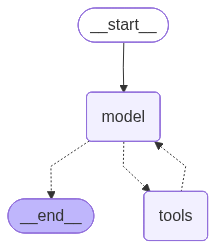

In [28]:
agent

### User Query

In [29]:
input_message = {
    "role": "user",
    "content":"In which city PM Narendra Modi is inaugrating new airport terminal on 20th Dec 2025 ? Give me link to a Youtube video related to this news",
}

### Display

In [30]:
for step in agent.stream(
    {"messages": [input_message]},
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

In which city PM Narendra Modi is inaugrating new airport terminal on 20th Dec 2025 ? Give me link to a Youtube video related to this news
================================== Ai Message ==================================
Tool Calls:
  duckduckgo_search (call_uWDyABcLhW8aFHIvsea0mwNX)
 Call ID: call_uWDyABcLhW8aFHIvsea0mwNX
  Args:
    query: Narendra Modi inaugurating new airport terminal 20th Dec 2025
  youtube_search (call_RQfCj7d3UZak3cEpsHGubfnZ)
 Call ID: call_RQfCj7d3UZak3cEpsHGubfnZ
  Args:
    query: Narendra Modi inaugurating new airport terminal 20th Dec 2025
================================= Tool Message =================================
Name: youtube_search

['https://www.youtube.com/watch?v=CZ1mwQ8JHvY&pp=ygU9TmFyZW5kcmEgTW9kaSBpbmF1Z3VyYXRpbmcgbmV3IGFpcnBvcnQgdGVybWluYWwgMjB0aCBEZWMgMjAyNQ%3D%3D', 'https://www.youtube.com/watch?v=t8KJxHeoXXo&pp=ygU9TmFyZW5kcmEgTW9kaSBpbmF1Z3VyYXRpbmcgbmV3IGFp